In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

In [5]:
df=pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df=df.drop(['PassengerId','Ticket','Fare','Cabin','Name'], axis=1)

In [10]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [11]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [13]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [39]:
X= df.drop(['Survived'], axis=1)
y=df['Survived']
le= LabelEncoder()
for col in X.columns:
    if X[col].dtype=='object':
        X[col]=le.fit_transform(X[col])
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2, random_state=42)

In [40]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,22.0,1,0,2
1,1,0,38.0,1,0,0
2,3,0,26.0,0,0,2
3,1,0,35.0,1,0,2
4,3,1,35.0,0,0,2


In [41]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

In [43]:
models={"LR":LogisticRegression(), "DT": DecisionTreeClassifier(), "RF": RandomForestClassifier(), "SVC": SVC()}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.3f}")

LR Accuracy: 0.810
DT Accuracy: 0.782
RF Accuracy: 0.827
SVC Accuracy: 0.609


In [44]:
model=RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [45]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: ", classification_report(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))

Accuracy:  0.8156424581005587
Classification Report:                precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179

Confusion Matrix:  [[93 12]
 [21 53]]


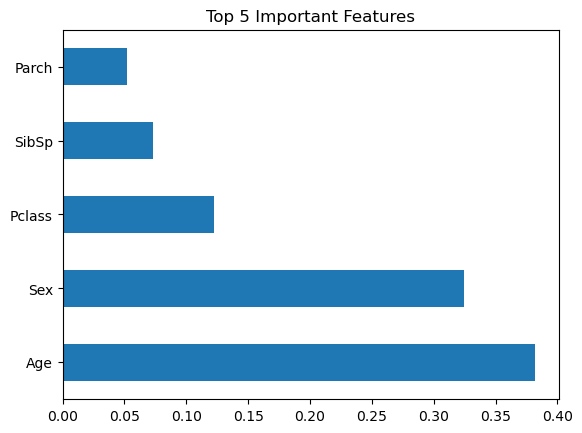

In [46]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title("Top 5 Important Features")
plt.show()

In [54]:
print("Prediction (1 = Survived, 0 = Not Survived):", model.predict(X_test))

Prediction (1 = Survived, 0 = Not Survived): [0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1]


In [55]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 709 to 10
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    179 non-null    int64  
 1   Sex       179 non-null    int32  
 2   Age       179 non-null    float64
 3   SibSp     179 non-null    int64  
 4   Parch     179 non-null    int64  
 5   Embarked  179 non-null    int32  
dtypes: float64(1), int32(2), int64(3)
memory usage: 8.4 KB


In [58]:
print(pd.Series(model.predict(X_test)).value_counts())

0    114
1     65
Name: count, dtype: int64
